#### single-label, multiclass classification problem

In [1]:
# imorting necessary libraries
from keras.datasets import reuters
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the reuters dataset in Keras and split data into train and test
# num_words=10000 means keep top 10,000 most frequently occurring words in the training data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(len(train_data))
print(len(test_data))

8982
2246


In [3]:
# Display content of one of the movie review in english
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '. join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [4]:
# Encoding the integer sequences into a binary matrix - one hot encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# Preparing the labels as per network requirement
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [8]:
#  network architecture
# Sequential class used only for linear stacks of layers
# functional API used for directed acyclic graphs of layers
model = models.Sequential()
# fully connected layer with 64 filters
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
# fully connected layer with 64 filters
model.add(layers.Dense(64, activation='relu'))
# fully connected layer with 46 output classes
model.add(layers.Dense(46, activation='softmax'))

# compilation step
# binary crossentropy for a two-class classification problem
# categorical crossentropy for a many-class classification problem
# meansquared error for a regression problem
# connectionist temporal classification for a sequence-learning problem
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

# training step
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

# evaluation step
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
16/16 [==============================] - 1s 27ms/step - loss: 2.7920 - accuracy: 0.5049 - val_loss: 1.8828 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.5511 - accuracy: 0.6865 - val_loss: 1.3913 - val_accuracy: 0.6980
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 1.1775 - accuracy: 0.7435 - val_loss: 1.1877 - val_accuracy: 0.7360
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.9609 - accuracy: 0.7879 - val_loss: 1.0828 - val_accuracy: 0.7590
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7972 - accuracy: 0.8287 - val_loss: 1.0306 - val_accuracy: 0.7750
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6739 - accuracy: 0.8550 - val_loss: 0.9624 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5685 - accuracy: 0.8771 - val_loss: 0.9259 - val_accuracy: 0.8020
Epoch 8/20
16

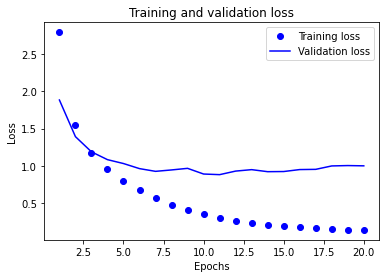

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

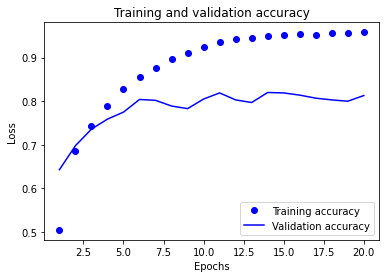

In [12]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.201246660730187

In [14]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [15]:
predictions[0].shape

(46,)

In [16]:
np.sum(predictions[0])

0.99999994

In [17]:
np.argmax(predictions[0])

3